In [ ]:
# NEW DL

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/AI dataset/train.zip" -d "/content/train"
!unzip "/content/drive/MyDrive/AI dataset/test.zip" -d "/content/test"

Streaming output truncated to the last 5000 lines.
  inflating: /content/test/test/REAL/0500 (10).jpg  
  inflating: /content/test/test/REAL/0500 (2).jpg  
  inflating: /content/test/test/REAL/0500 (3).jpg  
  inflating: /content/test/test/REAL/0500 (4).jpg  
  inflating: /content/test/test/REAL/0500 (5).jpg  
  inflating: /content/test/test/REAL/0500 (6).jpg  
  inflating: /content/test/test/REAL/0500 (7).jpg  
  inflating: /content/test/test/REAL/0500 (8).jpg  
  inflating: /content/test/test/REAL/0500 (9).jpg  
  inflating: /content/test/test/REAL/0500.jpg  
  inflating: /content/test/test/REAL/0501 (10).jpg  
  inflating: /content/test/test/REAL/0501 (2).jpg  
  inflating: /content/test/test/REAL/0501 (3).jpg  
  inflating: /content/test/test/REAL/0501 (4).jpg  
  inflating: /content/test/test/REAL/0501 (5).jpg  
  inflating: /content/test/test/REAL/0501 (6).jpg  
  inflating: /content/test/test/REAL/0501 (7).jpg  
  inflating: /content/test/test/REAL/0501 (8).jpg  
  inflating: /c

In [ ]:
import os
import shutil
import numpy as np

In [ ]:
def split_data(source_folder, target_folder, split_ratio):
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)
        os.makedirs(os.path.join(target_folder, 'REAL'))
        os.makedirs(os.path.join(target_folder, 'FAKE'))

    for category in ['REAL', 'FAKE']:
        files = os.listdir(os.path.join(source_folder, category))
        np.random.shuffle(files)
        split_point = int(len(files) * split_ratio)

        # Files to move to validation
        files_to_move = files[:split_point]

        for file in files_to_move:
            shutil.move(os.path.join(source_folder, category, file),
                        os.path.join(target_folder, category, file))

In [ ]:
# Set the directories
train_directory = '/content/train/train'  # Adjust as necessary
test_directory = '/content/test/test'    # Adjust as necessary
validation_directory = '/content/train/validation'

In [ ]:
# Create validation set from train set (15% of the original train set)
split_data(train_directory, validation_directory, 0.1765)  # 15% from the original train set

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers

In [ ]:
# Setup directories
train_directory = '/content/train/train'
validation_directory = '/content/train/validation'
test_directory = '/content/test/test'


In [ ]:
# Parameters
batch_size = 64
image_size = 150
k_folds = 5

In [ ]:
# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Simple rescaling for validation and testing data
test_val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Setup generators
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='binary'
)

Found 82350 images belonging to 2 classes.


In [ ]:
validation_generator = test_val_datagen.flow_from_directory(
        validation_directory,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='binary'

)

Found 17650 images belonging to 2 classes.


In [ ]:
test_generator = test_val_datagen.flow_from_directory(
    test_directory,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='binary'

)

Found 20000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import models, layers, optimizers

In [ ]:
# Build and compile the model
model = models.Sequential()

# Input layer: no need to define 'input_layer' explicitly
# Convolutional Layer 1
model.add(layers.Conv2D(64, (3, 3), padding='valid', input_shape=(image_size, image_size, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(layers.Conv2D(128, (3, 3), padding='same'))  # Using padding='same' to maintain dimensions
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 3
model.add(layers.Conv2D(256, (3, 3), padding='same'))  # More filters, assuming more complex features
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 4
model.add(layers.Conv2D(256, (3, 3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flattening the output to feed it into the dense layer
model.add(layers.Flatten())

# Dense Layer 1
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout to prevent overfitting

# Output layer: using sigmoid activation function for binary classification
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),  # Setting the learning rate
              loss='binary_crossentropy',  # Appropriate loss function for binary classification
                            metrics=['accuracy'])  # Metric to monitor

In [ ]:
# Display the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 128)       73856     
                                                                 
 activation_1 (Activation)   (None, 74, 74, 128)       0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 128)       0         
 g2D)                                                   

In [ ]:
# Train the model with callbacks for early stopping and best model saving
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# Path to save the best model
checkpoint_path = '/content/drive/My Drive/My_Project/newmodel_best_weights.keras'
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [ ]:
# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,  # Increase or decrease epochs depending on your dataset and needs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[checkpoint, early_stopping],
    verbose=1
)

Epoch 1/10
1286/1286 [==============================] - ETA: 0s - loss: 0.3854 - accuracy: 0.8237
Epoch 1: val_loss improved from inf to 0.26507, saving model to /content/drive/My Drive/My_Project/newmodel_best_weights.keras
1286/1286 [==============================] - 595s 454ms/step - loss: 0.3854 - accuracy: 0.8237 - val_loss: 0.2651 - val_accuracy: 0.8902
Epoch 2/10
1286/1286 [==============================] - ETA: 0s - loss: 0.2657 - accuracy: 0.8886
Epoch 2: val_loss improved from 0.26507 to 0.21008, saving model to /content/drive/My Drive/My_Project/newmodel_best_weights.keras
1286/1286 [==============================] - 566s 440ms/step - loss: 0.2657 - accuracy: 0.8886 - val_loss: 0.2101 - val_accuracy: 0.9178
Epoch 3/10
1286/1286 [==============================] - ETA: 0s - loss: 0.2317 - accuracy: 0.9053
Epoch 3: val_loss improved from 0.21008 to 0.17530, saving model to /content/drive/My Drive/My_Project/newmodel_best_weights.keras
1286/1286 [==============================] 

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test accuracy: {:.2f}%".format(test_accuracy * 100))

312/312 [==============================] - 17s 56ms/step - loss: 0.1696 - accuracy: 0.9313
Test accuracy: 93.13%


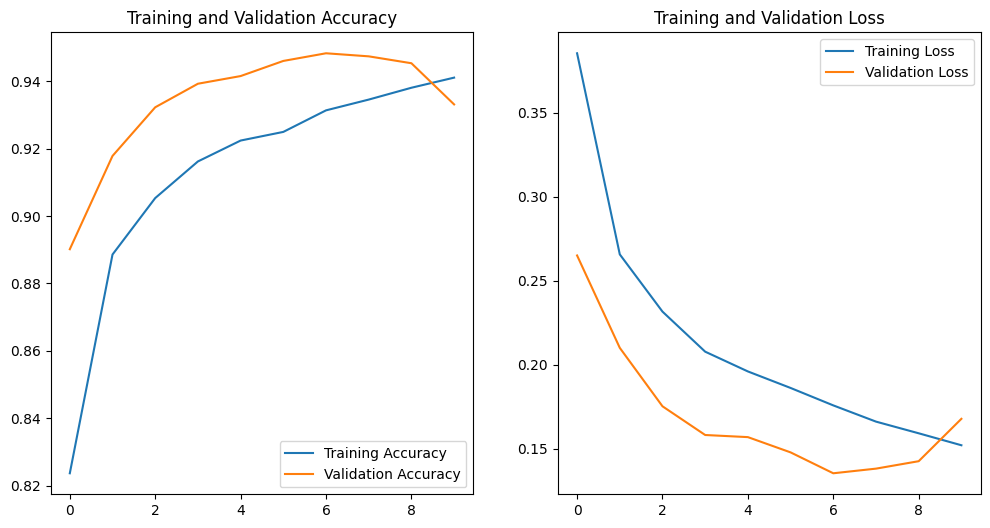

In [ ]:
# Plotting training and validation accuracy
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Reset the test generator to ensure correctness
test_generator.reset()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Load the saved model weights
model_path = '/content/drive/My Drive/My_Project/newmodel_best_weights.keras'
model = models.load_model(model_path)

In [ ]:
# Reset the test generator to ensure correctness
test_generator.reset()


In [ ]:
# Collect all predictions and true labels
predictions = []
labels = []
for _ in range(len(test_generator)):
    X_batch, y_batch = test_generator.next()
    y_pred_batch = model.predict(X_batch)
    predictions.extend(y_pred_batch)
    labels.extend(y_batch)

1/1 [==============================] - 0s 22ms/step


In [ ]:
# Convert predictions and labels to binary
predictions = np.array(predictions)
predictions = (predictions > 0.5).astype(int)
labels = np.array(labels)

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(labels, predictions)

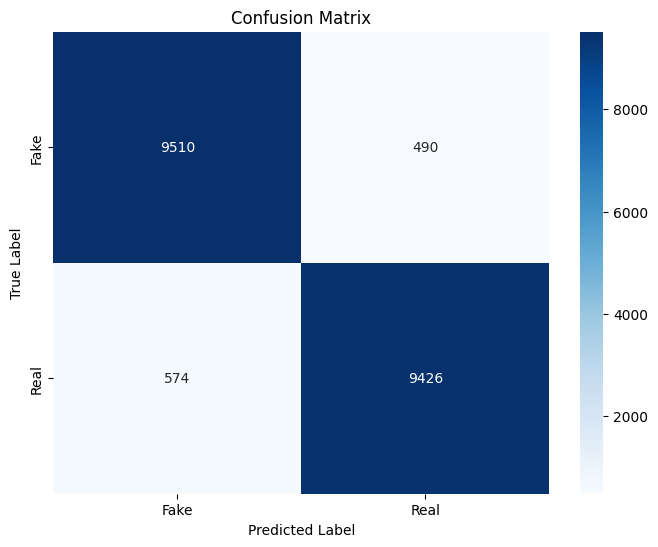

              precision    recall  f1-score   support

        Fake       0.94      0.95      0.95     10000
        Real       0.95      0.94      0.95     10000

    accuracy                           0.95     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000



In [ ]:
# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Display classification report
print(classification_report(labels, predictions, target_names=['Fake', 'Real']))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/train.zip" -d "/content/train"
!unzip "/content/drive/MyDrive/test.zip" -d "/content/test"

Streaming output truncated to the last 5000 lines.
  inflating: /content/test/test/REAL/0500 (10).jpg  
  inflating: /content/test/test/REAL/0500 (2).jpg  
  inflating: /content/test/test/REAL/0500 (3).jpg  
  inflating: /content/test/test/REAL/0500 (4).jpg  
  inflating: /content/test/test/REAL/0500 (5).jpg  
  inflating: /content/test/test/REAL/0500 (6).jpg  
  inflating: /content/test/test/REAL/0500 (7).jpg  
  inflating: /content/test/test/REAL/0500 (8).jpg  
  inflating: /content/test/test/REAL/0500 (9).jpg  
  inflating: /content/test/test/REAL/0500.jpg  
  inflating: /content/test/test/REAL/0501 (10).jpg  
  inflating: /content/test/test/REAL/0501 (2).jpg  
  inflating: /content/test/test/REAL/0501 (3).jpg  
  inflating: /content/test/test/REAL/0501 (4).jpg  
  inflating: /content/test/test/REAL/0501 (5).jpg  
  inflating: /content/test/test/REAL/0501 (6).jpg  
  inflating: /content/test/test/REAL/0501 (7).jpg  
  inflating: /content/test/test/REAL/0501 (8).jpg  
  inflating: /c

In [ ]:
import os
import shutil
import numpy as np

In [ ]:
def split_data(source_folder, target_folder, split_ratio):
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)
        os.makedirs(os.path.join(target_folder, 'REAL'))
        os.makedirs(os.path.join(target_folder, 'FAKE'))

    for category in ['REAL', 'FAKE']:
        files = os.listdir(os.path.join(source_folder, category))
        np.random.shuffle(files)
        split_point = int(len(files) * split_ratio)

        # Files to move to validation
        files_to_move = files[:split_point]

        for file in files_to_move:
            shutil.move(os.path.join(source_folder, category, file),
            os.path.join(target_folder, category, file))

In [ ]:
# Set the directories
train_directory = '/content/train/train'  # Adjust as necessary
test_directory = '/content/test/test'    # Adjust as necessary
validation_directory = '/content/train/validation'

In [ ]:
# Create validation set from train set (15% of the original train set)
split_data(train_directory, validation_directory, 0.1765)  # 15% from the original train set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# Setup directories
train_directory = '/content/train/train'
validation_directory = '/content/train/validation'
test_directory = '/content/test/test'

In [ ]:
# Parameters
batch_size = 64
image_size = 150
k_folds = 5

In [ ]:
# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Simple rescaling for validation and testing data
test_val_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
# Setup generators
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='binary'
)

Found 82350 images belonging to 2 classes.


In [ ]:
validation_generator = test_val_datagen.flow_from_directory(
    validation_directory,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='binary'


)

Found 17650 images belonging to 2 classes.


In [ ]:
test_generator = test_val_datagen.flow_from_directory(
    test_directory,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='binary'

)

Found 20000 images belonging to 2 classes.


In [ ]:
# Load the MobileNetV2 model, pre-trained on ImageNet
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
# Freeze the base model
base_model.trainable = False

In [ ]:
# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 2914369 (11.12 MB)
Trainable params: 65638

In [ ]:
# Callbacks
checkpoint = ModelCheckpoint('/content/drive/My Drive/My_Project/mobilenetv2_best_weights.keras', save_best_only=True, monitor='val_loss', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=4, verbose=1)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[checkpoint, early_stopping],
    verbose=1
)

Epoch 1/10
1286/1286 [==============================] - ETA: 0s - loss: 0.4070 - accuracy: 0.8115
Epoch 1: val_loss improved from inf to 0.31465, saving model to /content/drive/My Drive/My_Project/mobilenetv2_best_weights.keras
1286/1286 [==============================] - 2540s 2s/step - loss: 0.4070 - accuracy: 0.8115 - val_loss: 0.3147 - val_accuracy: 0.8653
Epoch 2/10
1286/1286 [==============================] - ETA: 0s - loss: 0.3540 - accuracy: 0.8441
Epoch 2: val_loss improved from 0.31465 to 0.30255, saving model to /content/drive/My Drive/My_Project/mobilenetv2_best_weights.keras
1286/1286 [==============================] - 2454s 2s/step - loss: 0.3540 - accuracy: 0.8441 - val_loss: 0.3026 - val_accuracy: 0.8703
Epoch 3/10
1286/1286 [==============================] - ETA: 0s - loss: 0.3350 - accuracy: 0.8536
Epoch 3: val_loss improved from 0.30255 to 0.29537, saving model to /content/drive/My Drive/My_Project/mobilenetv2_best_weights.keras
1286/1286 [===========================

In [ ]:
# Evaluate the model on test data before fine-tuning
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test accuracy before fine-tuning: {test_acc}')


312/312 [==============================] - 406s 1s/step - loss: 0.2507 - accuracy: 0.8977
Test accuracy before fine-tuning: 0.8977363705635071


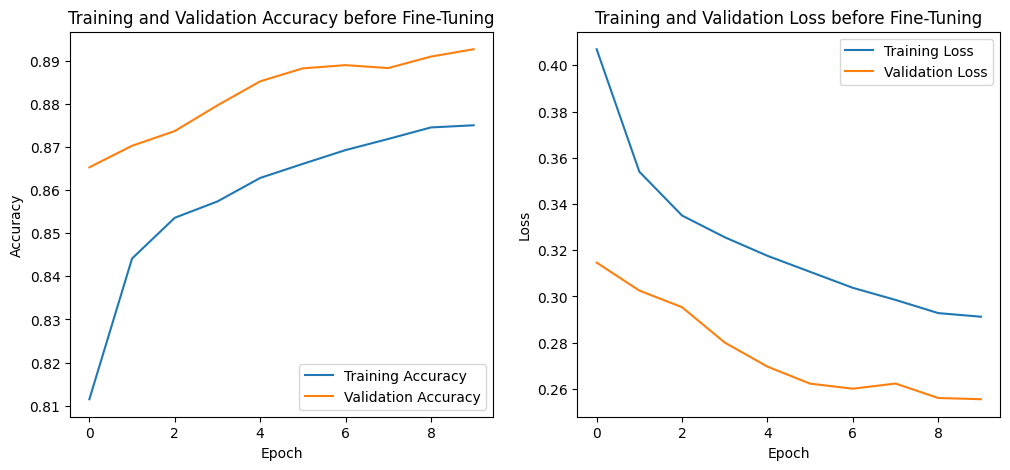

In [ ]:
# Plotting training and validation accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy before Fine-Tuning')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss before Fine-Tuning')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.models import load_model

# Verify the test generator configuration
print("Shuffling is", ("enabled" if test_generator.shuffle else "disabled"))
print("Total samples:", test_generator.samples)
print("Batch size:", batch_size)
print("Steps calculated for prediction:", math.ceil(test_generator.samples / batch_size))

# Load the model and confirm path
print("Loading model from:", '/content/drive/My Drive/My_Project/mobilenetv2_best_weights.keras')
model = load_model('/content/drive/My Drive/My_Project/mobilenetv2_best_weights.keras')

# Predict a small batch to inspect outputs
sample_predictions = model.predict(test_generator, steps=1)
print("Sample predictions:", sample_predictions[:5])



Shuffling is enabled
Total samples: 20000
Batch size: 64
Steps calculated for prediction: 313
Loading model from: /content/drive/My Drive/My_Project/mobilenetv2_best_weights.keras
1/1 [==============================] - 2s 2s/step
Sample predictions: [[0.33978146]
 [0.9052951 ]
 [0.10126915]
 [0.7845361 ]
 [0.00627024]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import math

# Load the model
model_path = '/content/drive/My Drive/My_Project/mobilenetv2_best_weights.keras'
model = load_model(model_path)
print("Model loaded from:", model_path)

Model loaded from: /content/drive/My Drive/My_Project/mobilenetv2_best_weights.keras


In [ ]:
# Setup the test generator without shuffling
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/test/test',  # Update the path to your test directory
    target_size=(150, 150),  # Update if a different size is used
    batch_size=64,
    class_mode='binary',
    shuffle=False
)


Found 20000 images belonging to 2 classes.


In [ ]:
# Calculate the correct number of prediction steps
test_steps = math.ceil(test_generator.samples / test_generator.batch_size)


In [ ]:
# Predict the test dataset
test_predictions = model.predict(test_generator, steps=test_steps)
test_predictions = np.round(test_predictions).astype(int)  # Convert probabilities to binary predictions

313/313 [==============================] - 365s 1s/step


In [ ]:
# Retrieve the actual labels from the test generator
test_labels = test_generator.classes


In [ ]:
# Compute confusion matrix
cm = confusion_matrix(test_labels, test_predictions.flatten())  # Flatten predictions if necessary


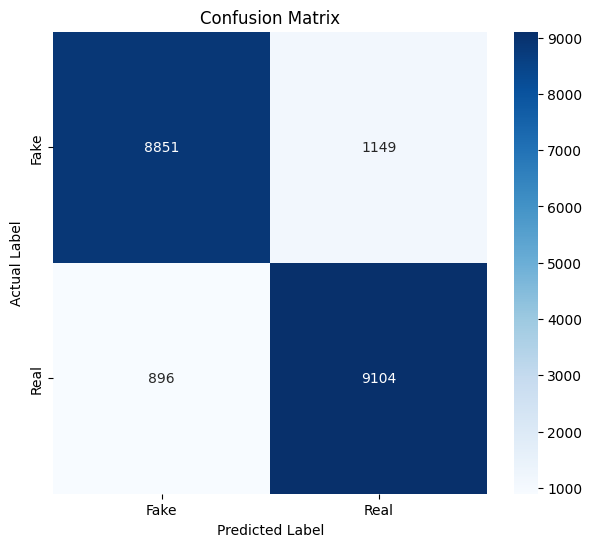

Classification Report:
              precision    recall  f1-score   support

        Fake       0.91      0.89      0.90     10000
        Real       0.89      0.91      0.90     10000

    accuracy                           0.90     20000
   macro avg       0.90      0.90      0.90     20000
weighted avg       0.90      0.90      0.90     20000



In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
report = classification_report(test_labels, test_predictions.flatten(), target_names=['Fake', 'Real'])  # Flatten predictions if necessary
print('Classification Report:')
print(report)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/train.zip" -d "/content/train"
!unzip "/content/drive/MyDrive/test.zip" -d "/content/test"

Streaming output truncated to the last 5000 lines.
  inflating: /content/test/test/REAL/0500 (10).jpg  
  inflating: /content/test/test/REAL/0500 (2).jpg  
  inflating: /content/test/test/REAL/0500 (3).jpg  
  inflating: /content/test/test/REAL/0500 (4).jpg  
  inflating: /content/test/test/REAL/0500 (5).jpg  
  inflating: /content/test/test/REAL/0500 (6).jpg  
  inflating: /content/test/test/REAL/0500 (7).jpg  
  inflating: /content/test/test/REAL/0500 (8).jpg  
  inflating: /content/test/test/REAL/0500 (9).jpg  
  inflating: /content/test/test/REAL/0500.jpg  
  inflating: /content/test/test/REAL/0501 (10).jpg  
  inflating: /content/test/test/REAL/0501 (2).jpg  
  inflating: /content/test/test/REAL/0501 (3).jpg  
  inflating: /content/test/test/REAL/0501 (4).jpg  
  inflating: /content/test/test/REAL/0501 (5).jpg  
  inflating: /content/test/test/REAL/0501 (6).jpg  
  inflating: /content/test/test/REAL/0501 (7).jpg  
  inflating: /content/test/test/REAL/0501 (8).jpg  
  inflating: /c

In [ ]:
import os
import shutil
import numpy as np

In [ ]:
def split_data(source_folder, target_folder, split_ratio):
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)
        os.makedirs(os.path.join(target_folder, 'REAL'))
        os.makedirs(os.path.join(target_folder, 'FAKE'))

    for category in ['REAL', 'FAKE']:
        files = os.listdir(os.path.join(source_folder, category))
        np.random.shuffle(files)
        split_point = int(len(files) * split_ratio)

    # Files to move to validation
        files_to_move = files[:split_point]

        for file in files_to_move:
            shutil.move(os.path.join(source_folder, category, file),
            os.path.join(target_folder, category, file))

In [ ]:
# Set the directories
train_directory = '/content/train/train'  # Adjust as necessary
test_directory = '/content/test/test'    # Adjust as necessary
validation_directory = '/content/train/validation'

In [ ]:
# Create validation set from train set (15% of the original train set)
split_data(train_directory, validation_directory, 0.1765)  # 15% from the original train set

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import math

In [ ]:
# Define paths
model_path = '/content/drive/MyDrive/My_Project/mobilenetv2_best_weights.keras'
train_directory = '/content/train/train'
validation_directory = '/content/train/validation'
test_directory = '/content/test/test'

In [ ]:
# Load the previously trained model
model = load_model(model_path)
print("Model loaded successfully from:", model_path)

Model loaded successfully from: /content/drive/MyDrive/My_Project/mobilenetv2_best_weights.keras


In [ ]:
# Ensure the base model layers are trainable for fine-tuning
base_model = model.layers[0]  # Adjust the index if your base model is not the first layer
base_model.trainable = True

In [ ]:
# Parameters
batch_size = 64
image_size = (150, 150)

In [ ]:
# Setup the ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Create the data generators for training, validation, and testing
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 82350 images belonging to 2 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_directory(
    validation_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'

)

Found 17650 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # Important for consistent labeling in evaluation

)

Found 20000 images belonging to 2 classes.


In [ ]:
# Compile the model with a lower learning rate for fine-tuning
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Set up callbacks
checkpoint = ModelCheckpoint(model_path, save_best_only=True, monitor='val_loss', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)


In [ ]:
# Continue training
history_fine = model.fit(
    train_generator,
    steps_per_epoch=math.ceil(train_generator.samples / batch_size),
    epochs=5,  # Adjust this to train for more or fewer epochs
    validation_data=validation_generator,
    validation_steps=math.ceil(validation_generator.samples / batch_size),
    callbacks=[checkpoint, early_stopping],
    verbose=1
)

Epoch 1/5
1287/1287 [==============================] - ETA: 0s - loss: 0.3514 - accuracy: 0.8489
Epoch 1: val_loss improved from inf to 1.34148, saving model to /content/drive/MyDrive/My_Project/mobilenetv2_best_weights.keras
1287/1287 [==============================] - 577s 424ms/step - loss: 0.3514 - accuracy: 0.8489 - val_loss: 1.3415 - val_accuracy: 0.6264
Epoch 2/5
1287/1287 [==============================] - ETA: 0s - loss: 0.2334 - accuracy: 0.9045
Epoch 2: val_loss improved from 1.34148 to 0.41199, saving model to /content/drive/MyDrive/My_Project/mobilenetv2_best_weights.keras
1287/1287 [==============================] - 546s 424ms/step - loss: 0.2334 - accuracy: 0.9045 - val_loss: 0.4120 - val_accuracy: 0.8436
Epoch 3/5
1287/1287 [==============================] - ETA: 0s - loss: 0.1954 - accuracy: 0.9220
Epoch 3: val_loss improved from 0.41199 to 0.18144, saving model to /content/drive/MyDrive/My_Project/mobilenetv2_best_weights.keras
1287/1287 [=============================

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=math.ceil(test_generator.samples / batch_size))
print('Test accuracy after fine-tuning:', test_acc)

313/313 [==============================] - 17s 55ms/step - loss: 0.1318 - accuracy: 0.9496
Test accuracy after fine-tuning: 0.9495999813079834


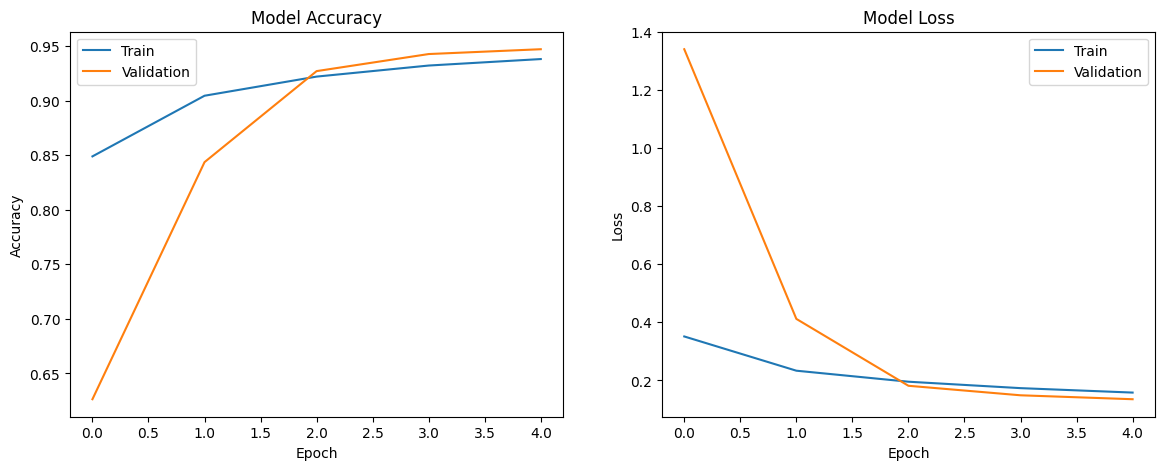

In [ ]:
import matplotlib.pyplot as plt
def plot_training(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Plot training & validation accuracy values
    ax1.plot(history.history['accuracy'], label='Train')
    ax1.plot(history.history['val_accuracy'], label='Validation')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()

    # Plot training & validation loss values
    ax2.plot(history.history['loss'], label='Train')
    ax2.plot(history.history['val_loss'], label='Validation')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    plt.show()

# Assuming history_fine is the history object returned by the fit method
plot_training(history_fine)

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Calculate the correct number of prediction steps
test_steps = math.ceil(test_generator.samples / test_generator.batch_size)

In [ ]:
# Predict the test dataset
test_predictions = model.predict(test_generator, steps=test_steps)
test_predictions = np.round(test_predictions).astype(int)  # Convert probabilities to binary predictions


313/313 [==============================] - 19s 58ms/step


In [ ]:
# Retrieve the actual labels from the test generator
test_labels = test_generator.classes

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(test_labels, test_predictions.flatten())  # Flatten predictions if necessary

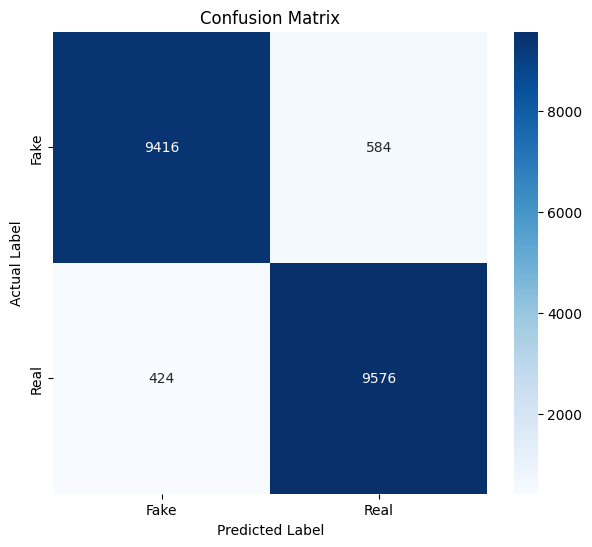

Classification Report:
              precision    recall  f1-score   support

        Fake       0.96      0.94      0.95     10000
        Real       0.94      0.96      0.95     10000

    accuracy                           0.95     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000



In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
report = classification_report(test_labels, test_predictions.flatten(), target_names=['Fake', 'Real'])  # Flatten predictions if necessary
print('Classification Report:')
print(report)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
mobilenet_model_path = '/content/drive/MyDrive/My_Project/mobilenetv2_best_weights.keras'
cnn_model_path = '/content/drive/MyDrive/My_Project/newmodel_best_weights.keras'

mobilenet_model = load_model(mobilenet_model_path)
cnn_model = load_model(cnn_model_path)


In [ ]:
test_data_path = '/content/test/test'
batch_size = 32

# Modify the test data generator to match the CNN input shape
test_datagen = ImageDataGenerator(rescale=1./255)  # Assuming you need to rescale inputs

test_generator = test_datagen.flow_from_directory(
    test_data_path,  # Make sure to define or replace `test_data_path` with the correct path to your data
    target_size=(150, 150),  # Adjusted to match the CNN model input shape
    batch_size=batch_size,  # Ensure this matches the size you used in model training
    class_mode='binary',  # or 'categorical', depending on your setup
    shuffle=False  # Typically set to False for evaluation to keep data order consistent
)



Found 20000 images belonging to 2 classes.


In [ ]:
print(cnn_model.input_shape)


(None, 150, 150, 3)


In [ ]:
# Should match cnn_model.input_shape
print(test_generator.image_shape)


(150, 150, 3)


In [ ]:
# Recalculate the number of prediction steps
test_steps = np.ceil(test_generator.samples / test_generator.batch_size)

# Predict probabilities for ROC and AUC
cnn_predictions = cnn_model.predict(test_generator, steps=test_steps)

# You may proceed with calculating ROC, AUC, or any other evaluations as before


625/625 [==============================] - 1069s 2s/step


In [ ]:
# Create a new test data generator for MobileNetV2 with the appropriate target size
mobilenet_test_datagen = ImageDataGenerator(rescale=1./255)  # Rescaling as per the usual preprocessing for MobileNetV2

mobilenet_test_generator = mobilenet_test_datagen.flow_from_directory(
    test_data_path,  # Ensure this points to your test data
    target_size=(224, 224),  # MobileNetV2's expected input size
    batch_size=batch_size,  # Same batch size or adjust as needed
    class_mode='binary',  # Ensure this matches your model's output configuration
    shuffle=False  # Important for evaluation to maintain order
)








Found 20000 images belonging to 2 classes.


In [ ]:
# Recalculate the number of prediction steps for MobileNetV2
mobilenet_test_steps = np.ceil(mobilenet_test_generator.samples / mobilenet_test_generator.batch_size)

# Predict probabilities for ROC and AUC using MobileNetV2
mobilenet_predictions = mobilenet_model.predict(mobilenet_test_generator, steps=mobilenet_test_steps)

625/625 [==============================] - 932s 1s/step


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [ ]:
# Retrieve actual class labels from the respective generators
cnn_test_labels = test_generator.classes
mobilenet_test_labels = mobilenet_test_generator.classes

In [ ]:
# Calculate ROC curve and AUC for CNN
fpr_cnn, tpr_cnn, _ = roc_curve(cnn_test_labels, cnn_predictions)
auc_cnn = auc(fpr_cnn, tpr_cnn)

In [ ]:
# Calculate ROC curve and AUC for MobileNetV2
fpr_mobilenet, tpr_mobilenet, _ = roc_curve(mobilenet_test_labels, mobilenet_predictions)
auc_mobilenet = auc(fpr_mobilenet, tpr_mobilenet)

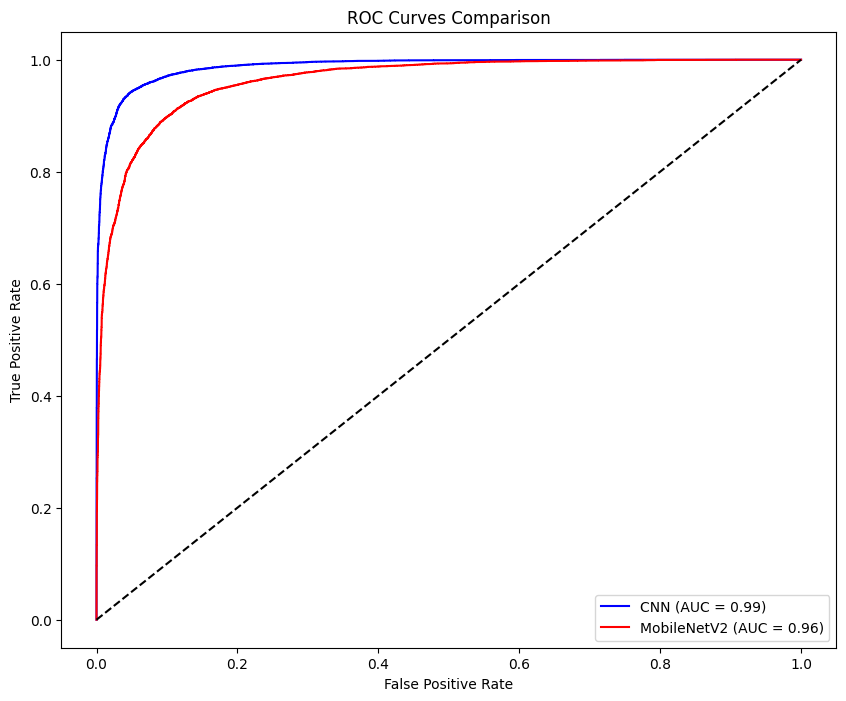

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(fpr_cnn, tpr_cnn, label=f'CNN (AUC = {auc_cnn:.2f})', color='blue')
plt.plot(fpr_mobilenet, tpr_mobilenet, label=f'MobileNetV2 (AUC = {auc_mobilenet:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--')  # Adds a diagonal dashed line to indicate random performance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.show()


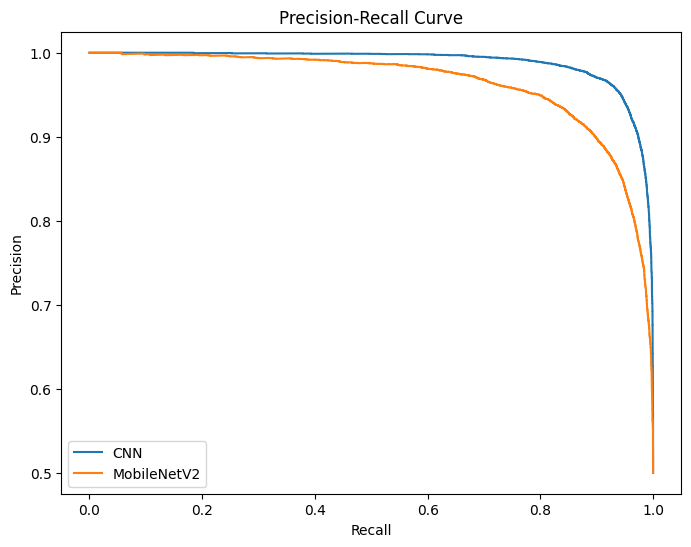

In [ ]:
from sklearn.metrics import precision_recall_curve
precision_cnn, recall_cnn, _ = precision_recall_curve(cnn_test_labels, cnn_predictions)
precision_mobilenet, recall_mobilenet, _ = precision_recall_curve(mobilenet_test_labels, mobilenet_predictions)

plt.figure(figsize=(8, 6))
plt.plot(recall_cnn, precision_cnn, label='CNN')
plt.plot(recall_mobilenet, precision_mobilenet, label='MobileNetV2')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
